In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [16]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Assignmwnt ML\Assignmwnt ML\temperatures - temperatures.csv")


In [17]:
# Display first few rows and column names
display(df.head())
print("\nColumn Names:", df.columns)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57



Column Names: Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')


In [18]:
# Selecting only the monthly columns
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
df = df[['YEAR'] + months]


In [19]:
# Reshape data to have 'Month' and 'AvgTemperature'
df_melted = df.melt(id_vars=['YEAR'], value_vars=months, var_name='Month', value_name='AvgTemperature')

In [20]:
# Convert month names to numerical values
month_mapping = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 'MAY': 5, 'JUN': 6,
    'JUL': 7, 'AUG': 8, 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}
df_melted['Month'] = df_melted['Month'].map(month_mapping)


In [21]:
# Drop any NaN values (if missing temperature data)
df_melted.dropna(inplace=True)


In [22]:
# Define features (X) and target (y)
X = df_melted[['Month']]
y = df_melted['AvgTemperature']


In [23]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Predict temperatures
y_pred = model.predict(X_test)


In [26]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-Squared: {r2}')


Mean Squared Error (MSE): 9.999806682283973
Mean Absolute Error (MAE): 2.705271869781447
R-Squared: -0.005573628993982727



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


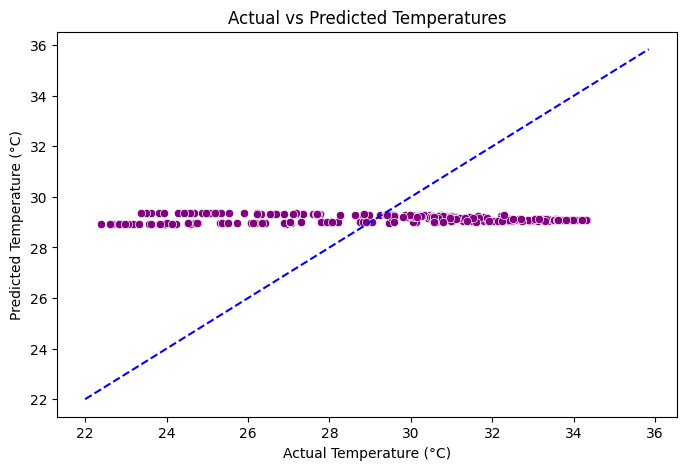

In [27]:

# Scatter plot of actual vs. predicted values
!pip install seaborn
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='blue')
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Actual vs Predicted Temperatures')
plt.show()

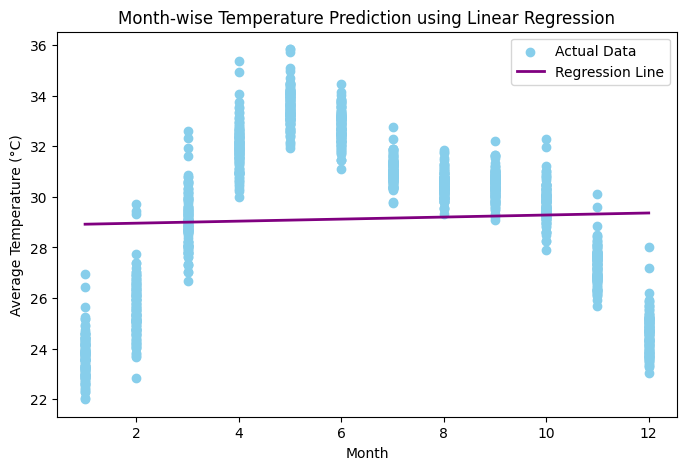

In [28]:
# Regression Line Visualization
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='skyblue', label='Actual Data')
plt.plot(X, model.predict(X), color='purple', linewidth=2, label='Regression Line')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Month-wise Temperature Prediction using Linear Regression')
plt.legend()
plt.show()
